# Principal Component Analysis with Cancer Data

In [73]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [96]:

df = pd.read_csv('breast-cancer-wisconsin-data.csv')
print(df.shape)

(699, 11)


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [75]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [79]:
df.drop("ID" , axis=1, inplace = True)

In [80]:
df.shape

(699, 10)

In [81]:
df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [82]:
df.head(100)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [12]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?



In [83]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [97]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [98]:
import numpy
df = df.replace('?', df.mean() )


In [99]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [100]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [101]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [102]:
# Check for correlation of variable
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


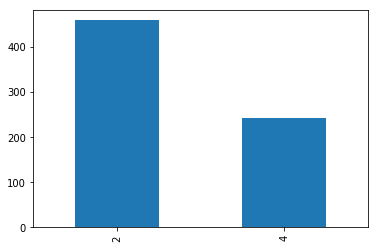

In [106]:
import pandas as pd  
pd.value_counts(df['Class']).plot(kind='bar')

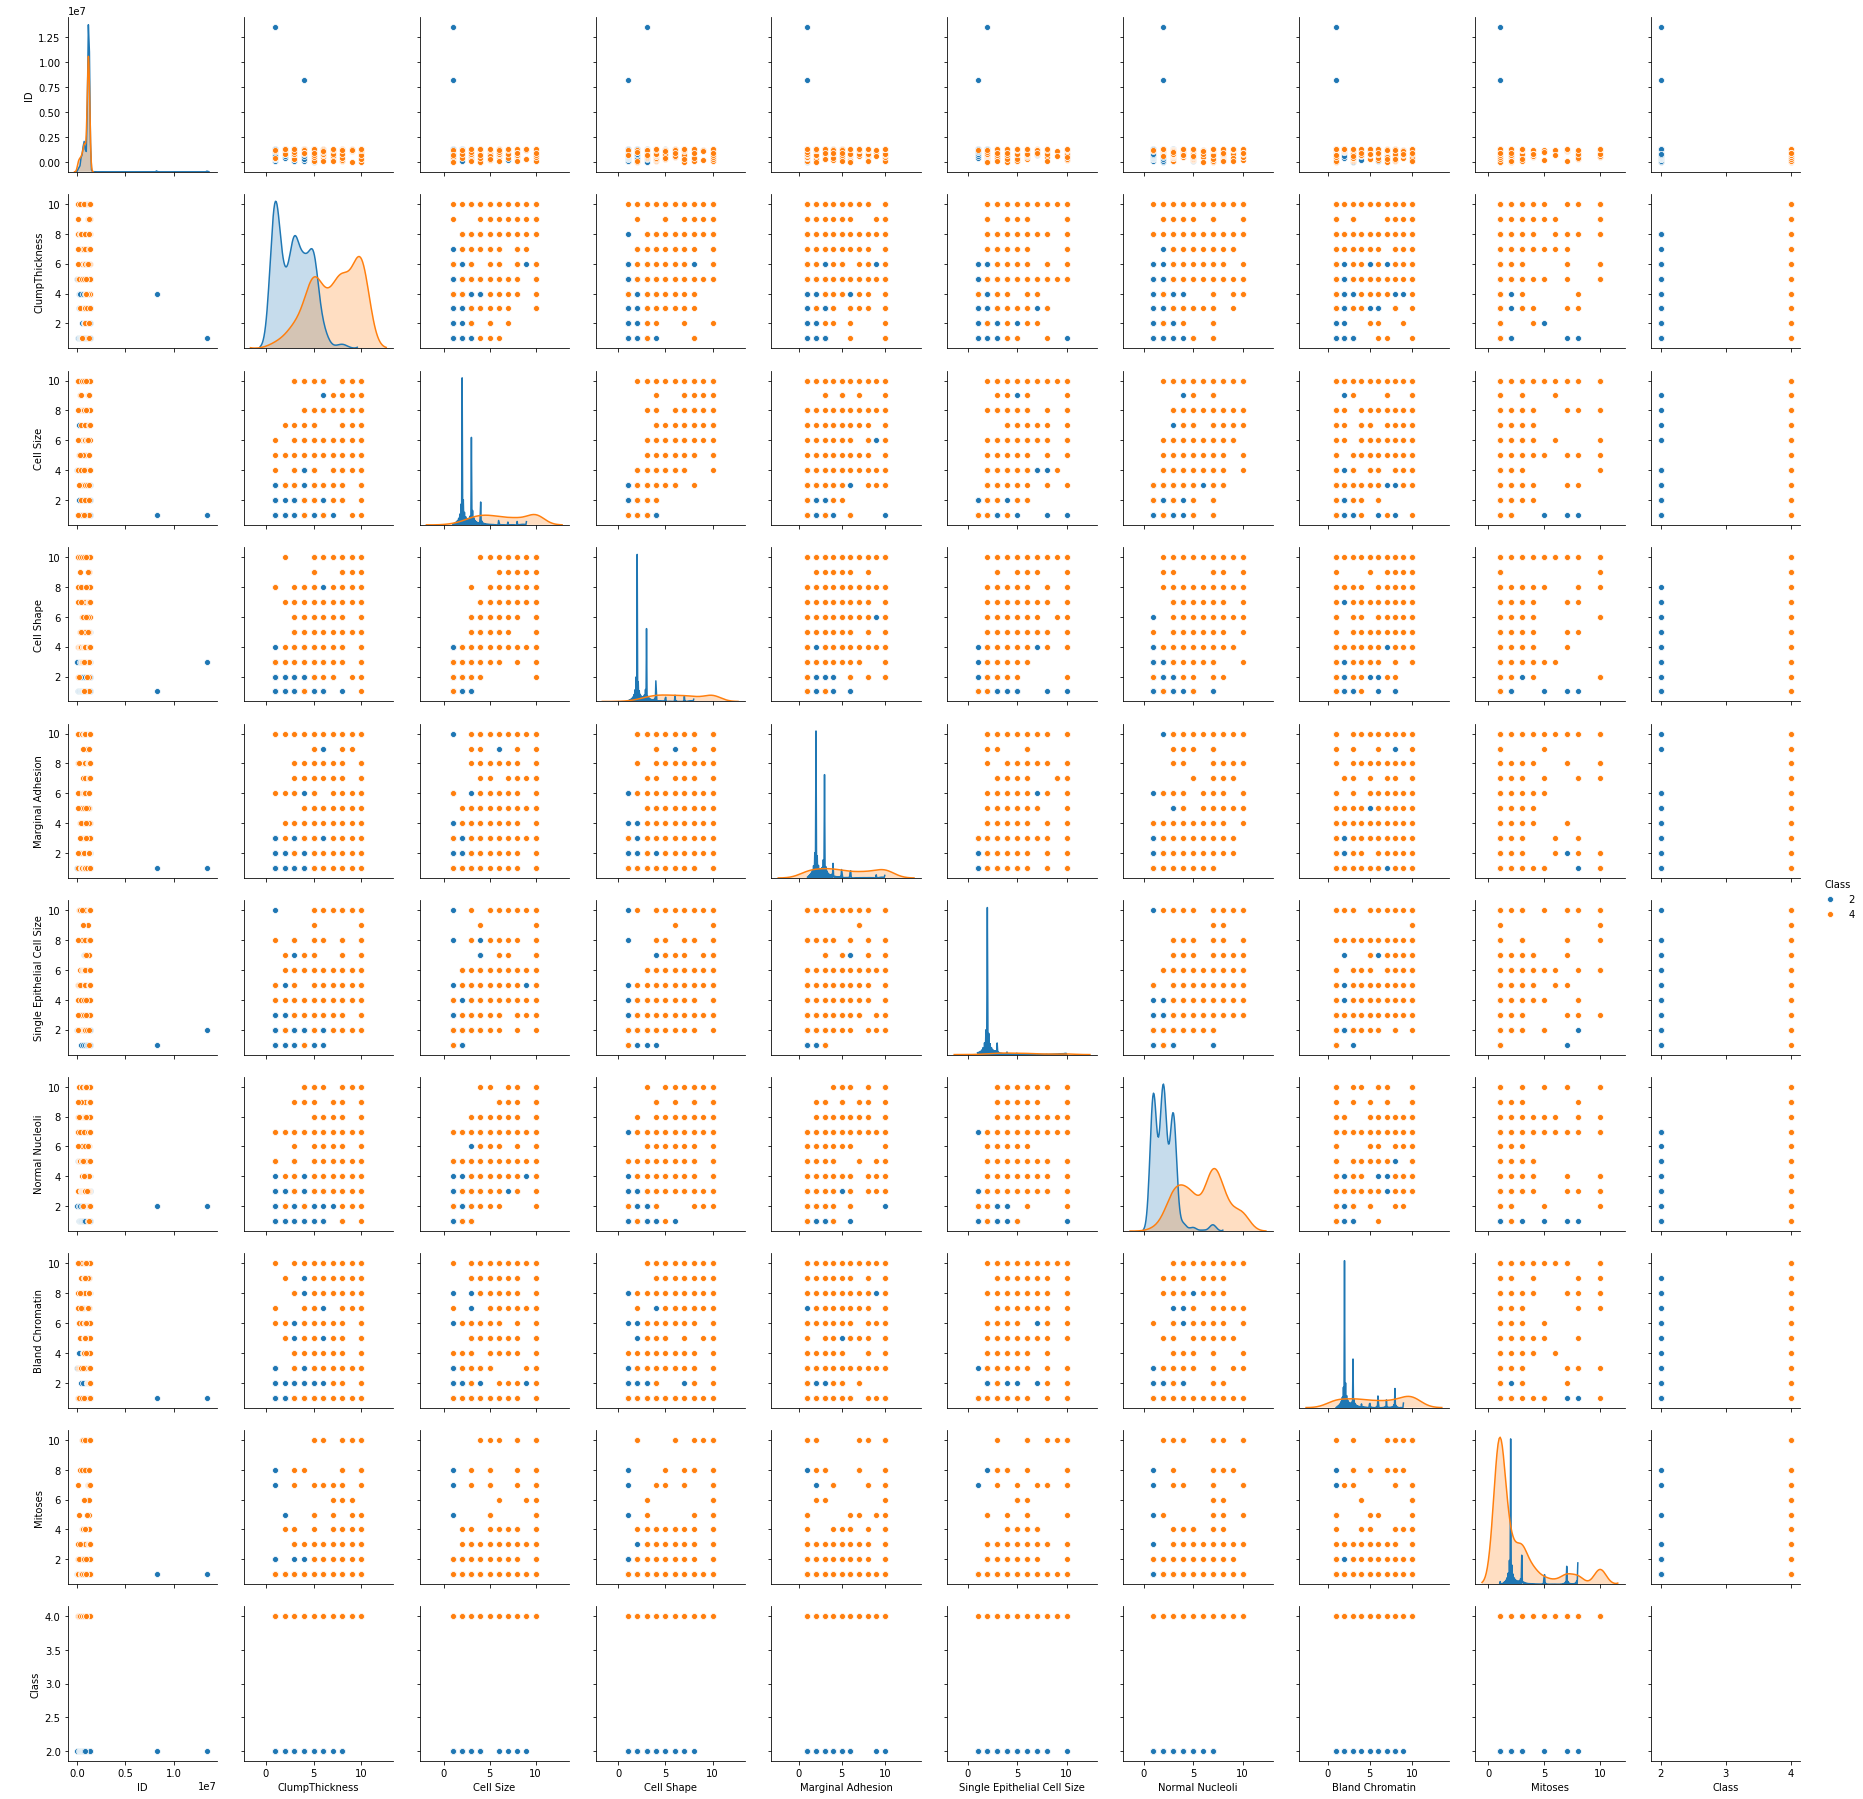

In [107]:
#Let us check for pair plots
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10


import seaborn as sns
sns.pairplot(df,diag_kind='kde', hue="Class")

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

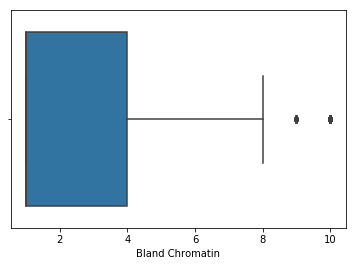

In [109]:
import seaborn as sns
sns.boxplot(x=df['Bland Chromatin'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [111]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[numeric_cols].apply(zscore)

In [56]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ClumpThickness                 1.421603
Cell Size                      1.311787
Cell Shape                     1.346898
Marginal Adhesion              1.051401
Single Epithelial Cell Size    0.903867
Normal Nucleoli                1.231214
Bland Chromatin                0.983140
Mitoses                        0.000000
Class                          2.103952
dtype: float64


In [112]:
df.shape

(699, 10)

In [58]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0             False      False       False              False   
1             False      False       False              False   
2             False      False       False              False   
3             False      False       False              False   
4             False      False       False              False   
5             False      False       False              False   
6             False      False       False              False   
7             False      False       False              False   
8             False      False       False              False   
9             False      False       False              False   
10            False      False       False              False   
11            False      False       False              False   
12            False      False       False              False   
13            False      False       False              False   
14            False      

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [113]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(504, 10)

In [114]:
df_out.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

# Q6 Create a covariance matrix for identifying Principal components

In [116]:
df_out.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.179662,-0.611825,-0.343912,-0.725397


In [117]:
import numpy as np
mean_vec = np.mean(df_out, axis=0)
print(' covariance matrix: \n%s' %np.cov(df_out.T))

 covariance matrix: 
[[ 1.29168707e+00 -3.42639921e-02 -3.57290522e-02 -2.59797255e-02
  -2.19691353e-02 -4.18085785e-02 -4.42198187e-02 -3.68960301e-02
   0.00000000e+00 -5.39896305e-02]
 [-3.42639921e-02  6.17983567e-01  2.58788065e-01  2.84327536e-01
   1.58554731e-01  1.40348277e-01  2.21507387e-01  1.49448767e-01
  -1.01940276e-32  3.23373807e-01]
 [-3.57290522e-02  2.58788065e-01  3.55265477e-01  3.45694304e-01
   1.88665908e-01  1.77001822e-01  2.44545618e-01  1.83078636e-01
   1.29385735e-32  3.16553099e-01]
 [-2.59797255e-02  2.84327536e-01  3.45694304e-01  4.13796431e-01
   1.94841336e-01  1.83410627e-01  2.65344818e-01  1.87414801e-01
  -3.52870186e-33  3.50067954e-01]
 [-2.19691353e-02  1.58554731e-01  1.88665908e-01  1.94841336e-01
   2.30605543e-01  1.15333293e-01  1.52407263e-01  1.14972246e-01
   1.88197433e-32  2.10367633e-01]
 [-4.18085785e-02  1.40348277e-01  1.77001822e-01  1.83410627e-01
   1.15333293e-01  2.07614668e-01  1.41654200e-01  1.07401374e-01
   1.3526690

# Q7 Identify eigen values and eigen vector

In [23]:
# Step 2- Get eigen values and eigen vector

In [122]:
cov_mat = np.cov(df_out.T)


eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)



Eigen Vectors 
%s [[-1.52381408e-01  9.87932633e-01 -1.17806561e-02  6.20017369e-03
  -4.96850798e-03 -1.05626398e-03  1.09367456e-02 -2.02213798e-02
   6.12161317e-03  0.00000000e+00]
 [ 4.10226025e-01  7.27046681e-02  8.95638662e-01  7.15695427e-02
   1.35327139e-03 -1.14783578e-01  7.48283519e-02  1.15825008e-02
   1.50761123e-02  8.18212077e-30]
 [ 3.81424740e-01  6.22191990e-02 -1.61690389e-01 -2.98739116e-01
  -7.60516457e-01 -2.04356829e-01 -2.58771384e-01  2.17925698e-01
  -2.55707475e-02  1.23768070e-29]
 [ 4.11949960e-01  7.76910609e-02 -1.55613222e-01 -2.84011441e-01
   6.34282689e-01 -1.30151036e-01 -4.58472124e-01  2.99821621e-01
   6.31200379e-03  1.95801254e-30]
 [ 2.44170170e-01  4.03010884e-02 -1.32883417e-01 -2.45634319e-01
   7.09379118e-02  2.21646297e-01  7.53030825e-01  4.53915187e-01
  -1.83054204e-01 -1.27486785e-29]
 [ 2.24599104e-01  1.85159984e-02 -1.43153430e-01 -2.46852600e-01
   5.68951898e-02 -2.01974590e-01  2.96429514e-01 -3.92343165e-01
   7.62855737e-

# Q8 Find variance and cumulative variance by each eigen vector

In [123]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.9595097199942955, array([-1.52381408e-01,  4.10226025e-01,  3.81424740e-01,  4.11949960e-01,
        2.44170170e-01,  2.24599104e-01,  3.57494119e-01,  2.33416338e-01,
        5.17113578e-33,  4.48283227e-01])), (1.2766999588000332, array([9.87932633e-01, 7.27046681e-02, 6.22191990e-02, 7.76910609e-02,
       4.03010884e-02, 1.85159984e-02, 4.79221465e-02, 2.48557807e-02,
       8.86142383e-34, 6.25671783e-02])), (0.346717032990856, array([-1.17806561e-02,  8.95638662e-01, -1.61690389e-01, -1.55613222e-01,
       -1.32883417e-01, -1.43153430e-01, -2.81542725e-01, -1.40067505e-01,
       -6.11332974e-32, -1.01475256e-01])), (0.20229892105173558, array([ 6.20017369e-03,  7.15695427e-02, -2.98739116e-01, -2.84011441e-01,
       -2.45634319e-01, -2.46852600e-01,  8.18448264e-01, -1.33708357e-01,
       -6.22449014e-31,  1.26189895e-01])), (0.12544445571806354, array([-1.05626398e-03, -1.14783578e-01, -2.04356829e-01, -1.30151036e-01,
        2.21646297e-01, -2.01974590e-01, -2.84930845

In [124]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
# an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

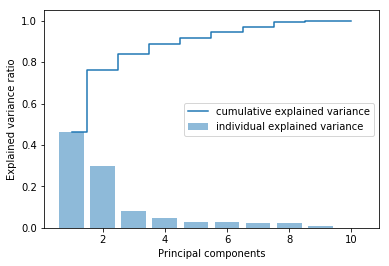

In [127]:
plt.bar(range(1,11), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [128]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_out)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [129]:
pca.components_

array([[-1.52381408e-01,  4.10226025e-01,  3.81424740e-01,
         4.11949960e-01,  2.44170170e-01,  2.24599104e-01,
         3.57494119e-01,  2.33416338e-01,  6.63774175e-33,
         4.48283227e-01],
       [ 9.87932633e-01,  7.27046681e-02,  6.22191990e-02,
         7.76910609e-02,  4.03010884e-02,  1.85159984e-02,
         4.79221465e-02,  2.48557807e-02, -7.21031065e-34,
         6.25671783e-02],
       [ 1.17806561e-02, -8.95638662e-01,  1.61690389e-01,
         1.55613222e-01,  1.32883417e-01,  1.43153430e-01,
         2.81542725e-01,  1.40067505e-01,  5.72974704e-32,
         1.01475256e-01],
       [-6.20017369e-03, -7.15695427e-02,  2.98739116e-01,
         2.84011441e-01,  2.45634319e-01,  2.46852600e-01,
        -8.18448264e-01,  1.33708357e-01,  2.71527390e-31,
        -1.26189895e-01],
       [-1.05626398e-03, -1.14783578e-01, -2.04356829e-01,
        -1.30151036e-01,  2.21646297e-01, -2.01974590e-01,
        -2.84930845e-01, -3.58763063e-01, -3.69840014e-29,
         7.

# Q10 Find correlation between components and features

In [130]:
pca.explained_variance_

array([1.95950972e+00, 1.27669996e+00, 3.46717033e-01, 2.02298921e-01,
       1.25444456e-01, 1.12065922e-01, 1.01035352e-01, 9.75722564e-02,
       3.57590897e-02, 1.23504565e-32])

In [131]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

df_outPC = np.dot(df_out,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(df_outPC) 

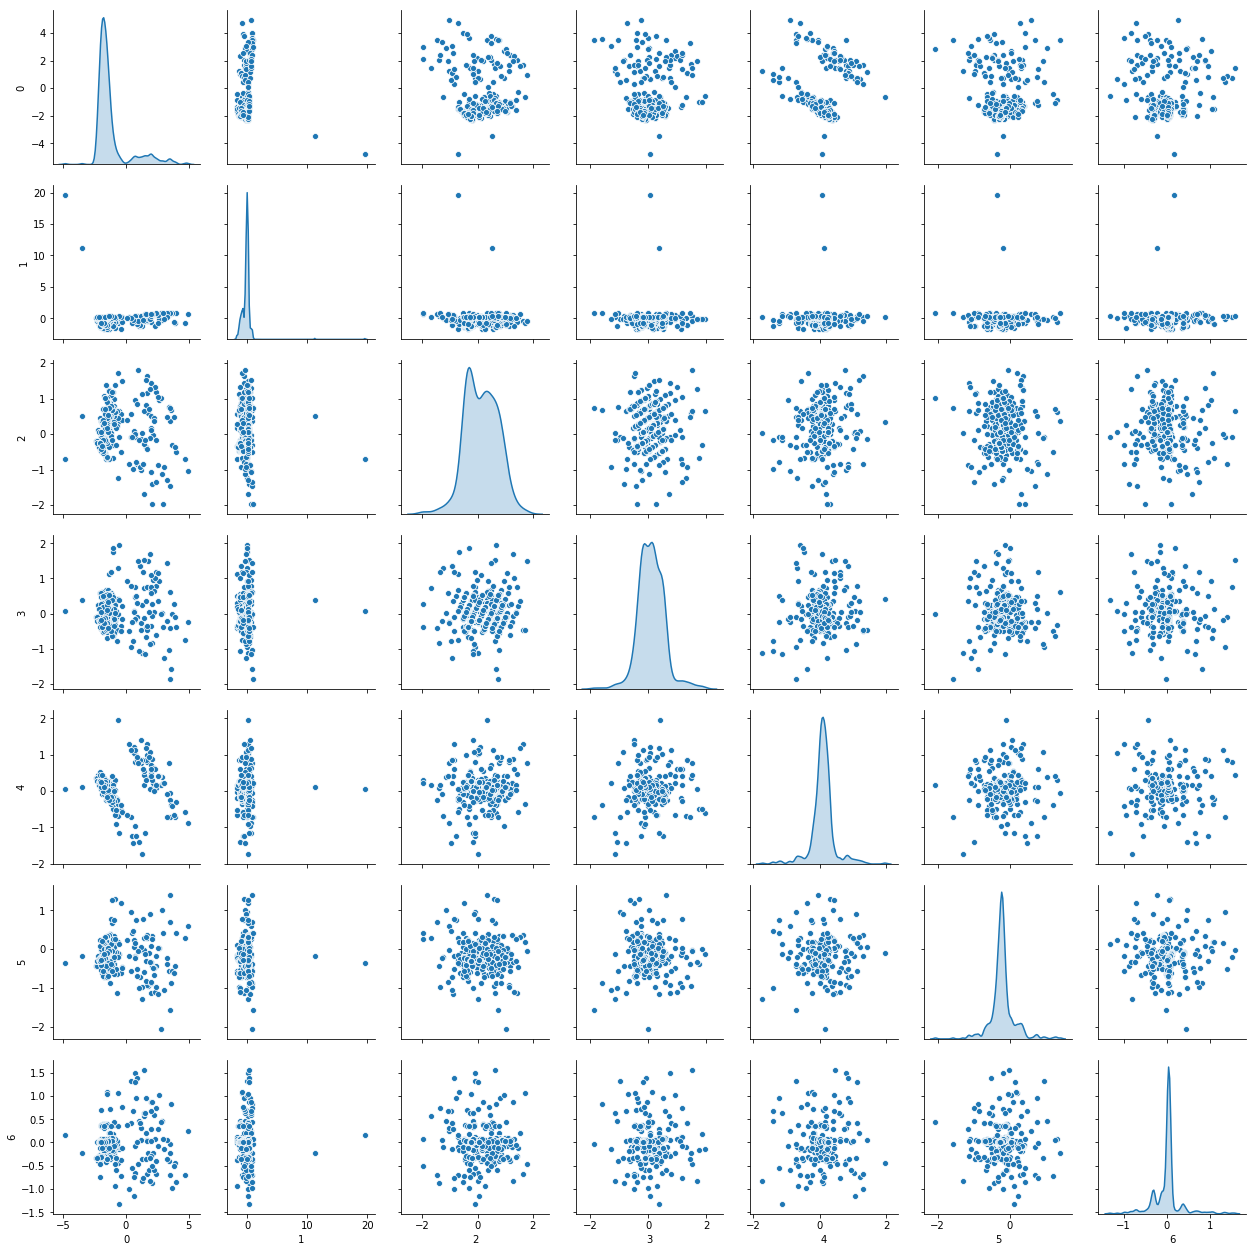

In [132]:
sns.pairplot(Proj_data_df, diag_kind='kde') 